# Задание 2

## Проверим Pandas
Скачать с Kaggle [данные с температурой по городам](https://www.kaggle.com/datasets/sudalairajkumar/daily-temperature-of-major-cities).

Если очень не хочется регистрироваться на сайте, архив *(2data.zip)* можно взять в папке с [заданием](https://disk.yandex.ru/d/MrtwhwSBdLuKKA).

In [9]:
import pandas as pd

Считать данные в `pandas.DataFrame`, посмотреть, что там лежит.

Если хотите вспомнить, как обращаться с DataFrame, могу порекомендовать [мини-курс](https://www.kaggle.com/code/residentmario/creating-reading-and-writing) на том же Kaggle:  там есть примеры всех нужных действий, сгруппированных на 6 страницах (считывание, обращение по индексу, изменение, типы данных).

In [10]:
temperature = pd.read_csv('city_temperature.csv', low_memory=False)

In [11]:
temperature.head()

,Region,Country,State,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,NaN,Algiers,1,1,1995,64.2
1,Africa,Algeria,NaN,Algiers,1,2,1995,49.4
2,Africa,Algeria,NaN,Algiers,1,3,1995,48.8
3,Africa,Algeria,NaN,Algiers,1,4,1995,46.4
4,Africa,Algeria,NaN,Algiers,1,5,1995,47.9


Сколько записей имеют нулевое значение по полю State?

In [12]:
temperature[temperature['State'].isnull()].shape[0]

1450990

Нужно сравнить выполнение операции над числами с плавающей точкой и над целыми числами. Для этого в DateFrame следует создать новый столбец, в который будут записаны значения температуры, умноженные на 10 и приведенные к *int*.

In [13]:
temperature['Temperature_int'] = (temperature['AvgTemperature'] * 10).astype(int)
temperature.head()

,Region,Country,State,City,Month,Day,Year,AvgTemperature,Temperature_int
0,Africa,Algeria,NaN,Algiers,1,1,1995,64.2,642
1,Africa,Algeria,NaN,Algiers,1,2,1995,49.4,494
2,Africa,Algeria,NaN,Algiers,1,3,1995,48.8,488
3,Africa,Algeria,NaN,Algiers,1,4,1995,46.4,464
4,Africa,Algeria,NaN,Algiers,1,5,1995,47.9,479


In [14]:
from datetime import datetime

Замерить время исполнения операции с данными (например, подсчета среднего значения `mean()` для столбца).

Предлагаю использовать библиотеку **datetime**, но можете использовать любую другую.


In [15]:
start_f = datetime.now()
value = temperature['AvgTemperature'].mean()
end_f = datetime.now()
print("Время выполнения:", end_f - start_f)

Время выполнения: 0:00:00.022853


In [16]:
start_i = datetime.now()
value = temperature['Temperature_int'].mean()
end_i = datetime.now()
print("Время выполнения:", end_i - start_i)

Время выполнения: 0:00:00.011335


## Проверка через numpy
Проверим то же самое для numpy массива. Для этого колонку `pd.Series` нужно привести к numpy массиву, явно указав тип данных. Для исходной температуры будет float64, для целочисленной - int16.

In [17]:
import numpy as np

In [18]:
temperature_float = temperature['AvgTemperature'].astype(np.float64).to_numpy()
temperature_int = temperature['Temperature_int'].astype(np.int16).to_numpy()

Замерить время выполнения той же операции `mean()`.

In [19]:
start_f = datetime.now()
value = temperature_float.mean()
end_f = datetime.now()
start_i = datetime.now()
value = temperature_int.mean()
end_i = datetime.now()
print("Время выполнения float:", end_f - start_f)
print("Время выполнения int:", end_i - start_i)

Время выполнения float: 0:00:00.006003
Время выполнения int: 0:00:00.006220


# Задание 3

In [119]:
import numpy as np
import pandas as pd

x1 = np.arange(1, 101)
x2 = np.arange(1, 101)
data = []
for i in x1:
    for j in x2:
        y = 3*i + 8*j
        data.append([i, j, y])


df = pd.DataFrame(data, columns=['x1', 'x2', 'y'])
df.to_csv('data_2.csv', index=False)

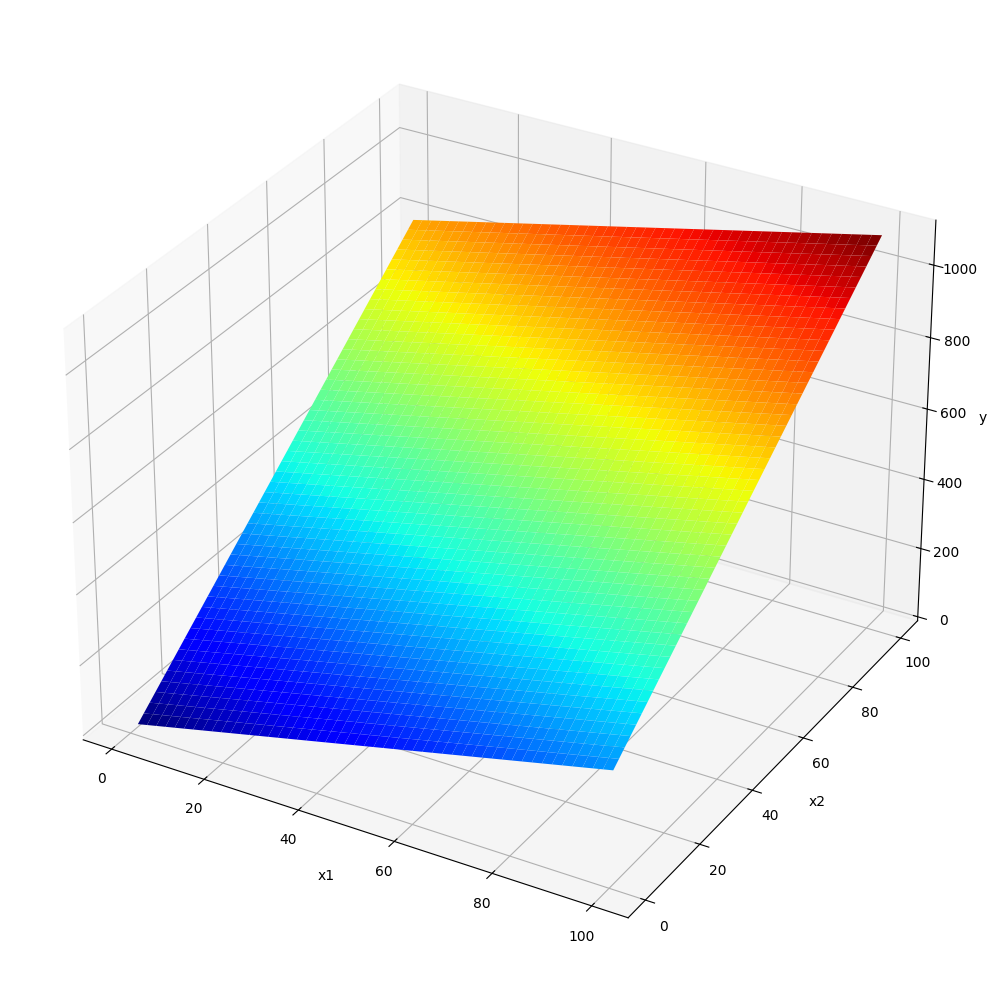

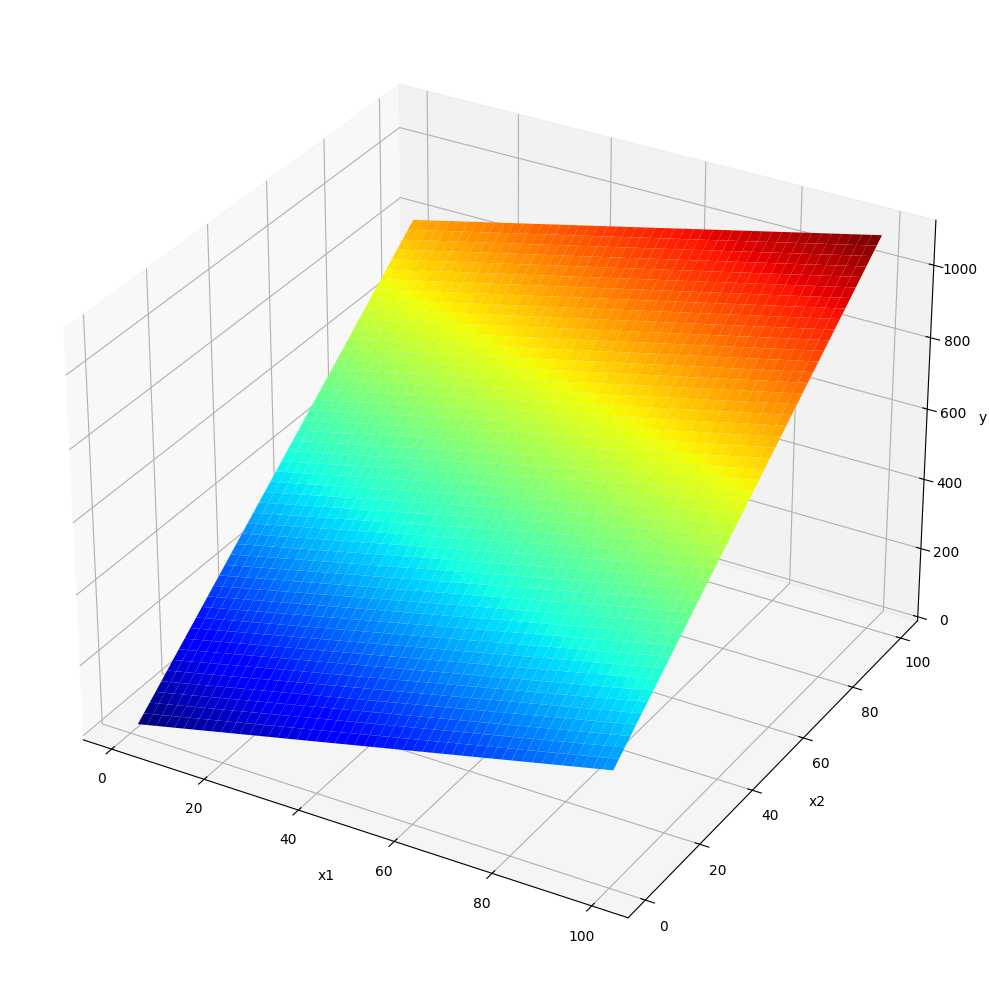

In [114]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

x1 = np.linspace(1, 100) 
x2 = np.linspace(1, 100)

X1, X2 = np.meshgrid(x1, x2)

Y = 3*X1 + 8*X2

Y_n = 3*X1 + 8*X2 + np.random.normal(0.01, 0.1)

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
surface = ax.plot_surface(X1, X2, Y, rstride=1, cstride=1, cmap=cm.jet)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')

# ax.view_init(elev=30, azim=45)

plt.tight_layout()
plt.show()

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
surface = ax.plot_surface(X1, X2, Y_n, rstride=1, cstride=1, cmap=cm.jet)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')

# ax.view_init(elev=30, azim=45)

plt.tight_layout()
plt.show()

In [120]:
import numpy as np
import pandas as pd
import random

class Neuron:
    def __init__(self, num_inputs):
        self.weights = np.random.uniform(-0.01, 0.01, num_inputs)
        self.bias = random.uniform(-0.01, 0.01)

    def calculate(self, inputs):
        result = np.dot(inputs, self.weights) + self.bias
        if np.isinf(result) or np.isnan(result):
            raise ValueError("NaN или бесконечность")
        return result

class NeuralNetwork:
    def __init__(self, num_neurons, num_inputs):
        self.neurons = [Neuron(num_inputs) for _ in range(num_neurons)]

    def fit_1(self, x, y, learning_rate=0.0001, target_error=0.001, epochs=1000):
        for epoch in range(epochs):
            total_error = 0
            for inputs, target in zip(x, y):
                for neuron in self.neurons:
                    prediction = neuron.calculate(inputs)
                    error = target - prediction
                    total_error += abs(error)

                    for i in range(len(neuron.weights)):
                        neuron.weights[i] += learning_rate * error * inputs[i]
                    neuron.bias += learning_rate * error

            if total_error <= target_error:
                print(f"Сеть сошлась на эпохе {epoch + 1} с ошибкой {total_error}, обучение остановлено.")
                return

data_1 = pd.read_csv('data_2.csv')
x_1 = data_1[['x1', 'x2']].values
y_1 = data_1['y'].values

x_1 = (x_1 - np.mean(x_1, axis=0)) / np.std(x_1, axis=0)

train_size = int(0.8 * len(x_1))
x_train, x_test = x_1[:train_size], x_1[train_size:]
y_train, y_test = y_1[:train_size], y_1[train_size:]

nn1 = NeuralNetwork(num_neurons=1, num_inputs=2)

nn1.fit_1(x_train, y_train, learning_rate=0.0001, target_error=0.001, epochs=1000)

for idx, neuron in enumerate(nn1.neurons):
    print(f"Нейрон {idx + 1}: веса = {neuron.weights}, смещение = {neuron.bias}")

Сеть сошлась на эпохе 53 с ошибкой 0.0009727886561563537, обучение остановлено.
Нейрон 1: веса = [ 86.59821    230.92856038], смещение = 555.4999999387105


# Задание 4

In [20]:
from PIL import Image

Загружаем изображение

In [21]:
im = Image.open('pic.jpg')

In [22]:
im.size

(1920, 1080)

In [23]:
import matplotlib.pyplot as plt

Посмотрим, что загрузилось

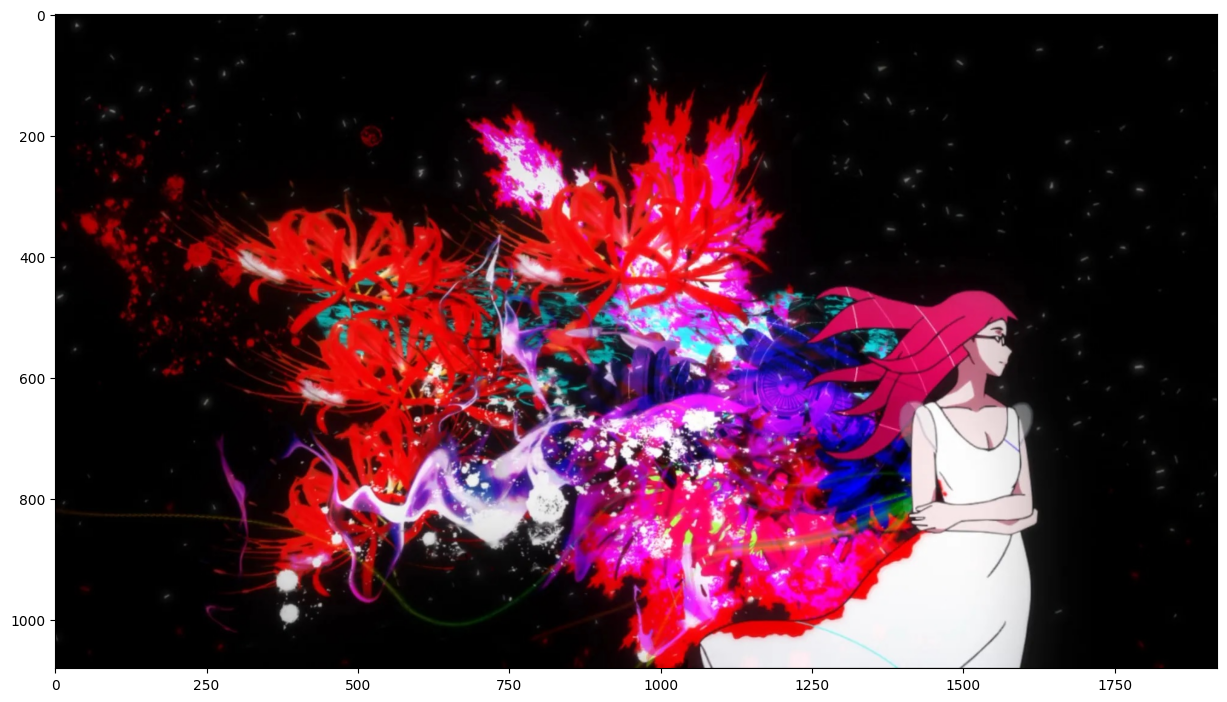

In [24]:
plt.figure(figsize=(15.,10.))
plt.imshow(im)

Переводим в трехмерный numpy массив (x, y, цвет).

In [25]:
a = np.asarray(im)
a[500:505, 495:500]

array([[[194,  24,  27],
        [203,  23,  24],
        [211,  21,  21],
        [218,  18,  20],
        [226,  16,  17]],

       [[185,  35,  36],
        [199,  36,  31],
        [206,  32,  25],
        [214,  27,  22],
        [220,  22,  19]],

       [[186,  64,  61],
        [197,  55,  43],
        [205,  48,  33],
        [210,  38,  26],
        [215,  31,  21]],

       [[200,  88,  77],
        [203,  67,  51],
        [209,  56,  38],
        [212,  45,  29],
        [216,  36,  22]],

       [[200,  74,  59],
        [208,  66,  46],
        [215,  56,  35],
        [217,  46,  29],
        [221,  38,  24]]], dtype=uint8)

Найдем фрагменты изображения, с нужным нам наличием/отсутствием цвета.

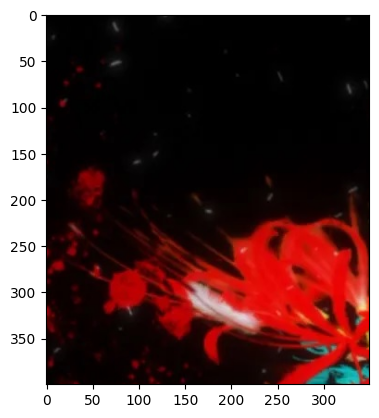

In [26]:
plt.imshow(a[100:500, 150:500])

**Красное:**

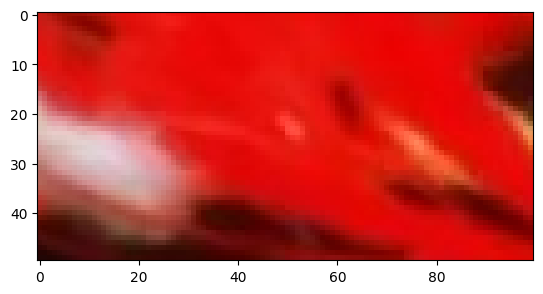

In [27]:
plt.imshow(a[400:450, 350:450])

**Не красное:**

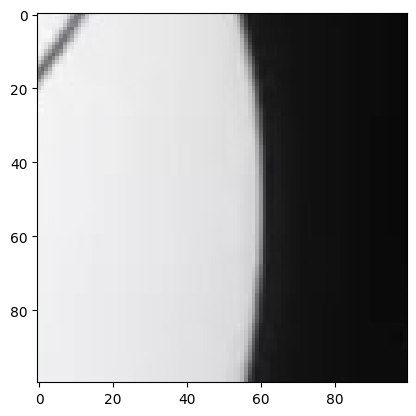

In [28]:
plt.imshow(a[900:1000, 1550:1650])

Подготовка набора данных для обучения.

Желательно, чередовать положительные и отрицательные примеры, при добавлении их в общий массив:

~~y = [0,0,0,1,1,1]~~

`y  = [0,1,0,1,0,1]`.

Должно получиться следующее (*для нейронки с 3-мя входами и одним выходом*):

|x_R|x_G|x_B|y_Target|
|---|---|---|---|
|255|255|0|1|
|0|0|255|0|



In [ ]:
red_area = a[400:450, 350:450]
not_red_area = a[900:1000, 1550:1650]

red_pixels = red_area.reshape(-1, 3)
not_red_pixels = not_red_area.reshape(-1, 3)

n_samples = min(len(red_pixels), len(not_red_pixels), 100)
red_pixels = red_pixels[:n_samples]
not_red_pixels = not_red_pixels[:n_samples]

y_red = np.ones(n_samples, dtype=int)
y_not_red = np.zeros(n_samples, dtype=int)


X = np.vstack([not_red_pixels, red_pixels]).reshape(2, n_samples, 3).transpose(1,0,2).reshape(-1,3)
y = np.vstack([y_not_red, y_red]).reshape(2, n_samples).transpose(1,0).reshape(-1)
df = pd.DataFrame(X, columns=['x_R', 'x_G', 'x_B'])
df['y_Target'] = y

print(df.head(10))

   x_R  x_G  x_B  y_Target
0  244  244  244         0
1  197   29   20         1
2  244  244  244         0
3  192   30   19         1
4  242  242  244         0
5  181   27   15         1
6  242  242  244         0
7  171   23    9         1
8  245  245  247         0
9  160   18    4         1


Делим данные на обучающую и тестовую выборки вручную **(без использования библиотеки sklearn)**.

Самый простой вариант: каждый **n**-й набор уходит в тестовую выборку.

Проверить, что и в обучающей и в тестовой выборке есть как положительные, так и отрицательные примеры.

In [ ]:
n = 5

test_idx = np.arange(len(df)) % n == 0
train_idx = ~test_idx

df_train = df[train_idx].reset_index(drop=True)
df_test = df[test_idx].reset_index(drop=True)

x_train = df_train[['x_R', 'x_G', 'x_B']].values
y_train = df_train['y_Target'].values
x_test = df_test[['x_R', 'x_G', 'x_B']].values
y_test = df_test['y_Target'].values

160
160
40
40


Обучение, оценка результатов, вывод весовых коэффициентов

*Это происходит в лабе по другому предмету; когда будет готово, можно будет импортировать код библиотекой, подрубить класс нейронки и проверить, как она работает* :)

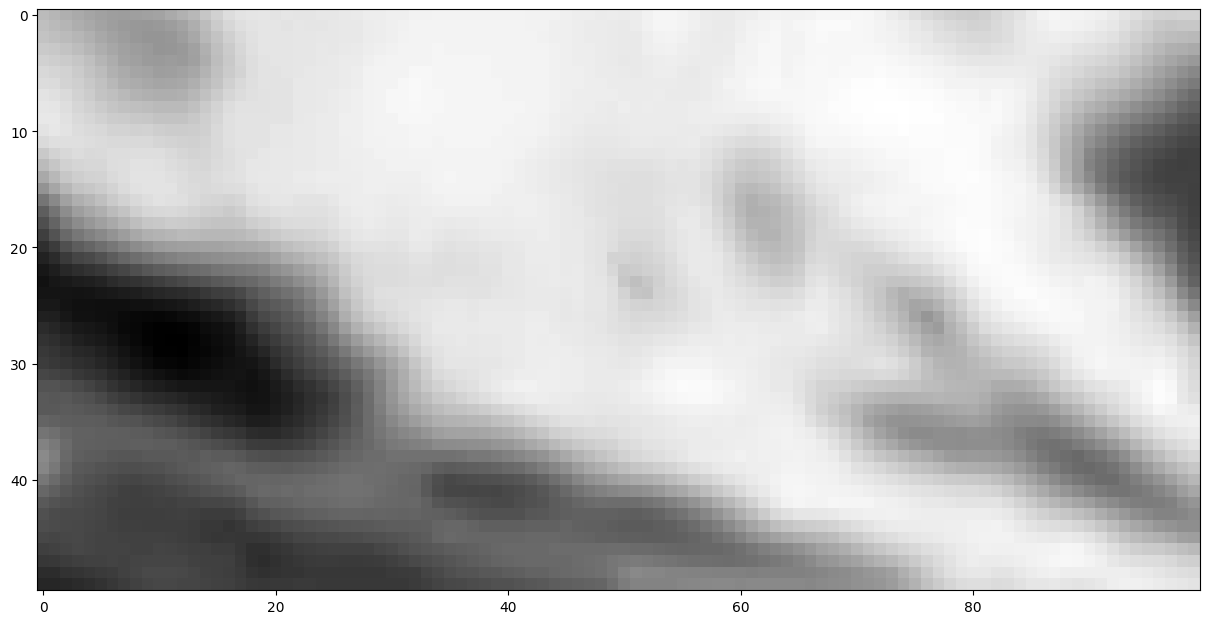

In [ ]:
import numpy as np
import pandas as pd
import random
from PIL import Image
import matplotlib.pyplot as plt

class Neuron:
    def __init__(self, num_inputs):
        self.weights = np.random.uniform(-0.01, 0.01, num_inputs)
        self.bias = random.uniform(-0.01, 0.01)

    def calculate(self, inputs):
        result = np.dot(inputs, self.weights) + self.bias
        if np.isinf(result) or np.isnan(result):
            raise ValueError("NaN или бесконечность")
        return result

class NeuralNetwork:
    def __init__(self, num_neurons, num_inputs):
        self.neurons = [Neuron(num_inputs) for _ in range(num_neurons)]

    def predict(self, x):
        return np.array([neuron.calculate(x) for neuron in self.neurons])

    def predict_image(self, pixels):
        return np.array([float(self.predict(pixel[:3])[0]) for pixel in pixels])

    def fit_1(self, x, y, learning_rate=0.0001, target_error=0.001, epochs=1000):
        for epoch in range(epochs):
            total_error = 0
            for inputs, target in zip(x, y):
                for neuron in self.neurons:
                    prediction = neuron.calculate(inputs)
                    error = target - prediction
                    total_error += abs(error)

                    for i in range(len(neuron.weights)):
                        neuron.weights[i] += learning_rate * error * inputs[i]
                    neuron.bias += learning_rate * error

            if total_error <= target_error:
                return


nn = NeuralNetwork(1, 3)
x_train_normalized = (x_train - np.mean(x_train, axis=0)) / np.std(x_train, axis=0)
x_test_normalized = (x_test - np.mean(x_test, axis=0)) / np.std(x_test, axis=0)

nn.fit_1(x_train_normalized, y_train)
predicted_pixels = nn.predict_image(x_test_normalized)

predicted_image = Image.fromarray((predicted_pixels * 255).astype(np.uint8))

def process_image(image_path, nn):
    # a = np.asarray(Image.open('pic.jpg'))
    mas = red_area.reshape(-1, 3)
    res = []
    res = nn.predict_image(mas)
    our_array = np.array(res).reshape(red_area.shape[0], red_area.shape[1])
    return our_array * 255

processed_image = process_image('pic.jpg', nn)
plt.figure(figsize=(15., 10.))
plt.imshow(processed_image, cmap='gray')
plt.show()



Проверка работы `Image.fromarray()` для вывода результатов обучения

In [56]:
var_1 = np.array([[300,0,300,300,300],
                [100,0,100,100,100],
                [0,0,0,0,0],
                [100,0,100,100,100],
                [0,0,0,0,0]], dtype='uint8')
var_2 = np.array([[[300,300,300],[0,0,0],[300,0,0],[0,300,0],[0,0,300]],
                [[100,0,0],[0,0,0],[100,0,0],[100,0,0],[100,0,0]],
                [[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0]],
                [[100,0,0],[0,0,0],[100,0,0],[100,0,0],[100,0,0]],
                [[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0]]], dtype='uint8')
print(var_1.shape)
plt.imshow(Image.fromarray(var_1, mode="L"))
# plt.imshow(Image.fromarray(var_2, mode="RGB"))

OverflowError: Python integer 300 out of bounds for uint8

# Работает с моделью машинного обучения:

> Тут была магия, которую вам надо реализовать.

In [32]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression().fit(x_train, y_train)
model.score(x_test, y_test)


1.0

Подготовка данных (всего изображения) для передачи в нейронку.

Обработка данных нейронной сетью.

In [64]:
res = []
for i in range(len(mas)):
    res.append(100*model.predict(mas[i]))

ValueError: Expected 2D array, got 1D array instead:
array=[1 1 1].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

Преобразование полученного от нейронки списка в массив для вывода на экран.

In [ ]:
our_array = np.array(res, dtype='uint8').reshape(1080,1920)

Проверка количества пикселей, распознанных как красные.

In [ ]:
res.count([100]), res.count([0])

(307620, 1765980)

На мой взгляд, топ:

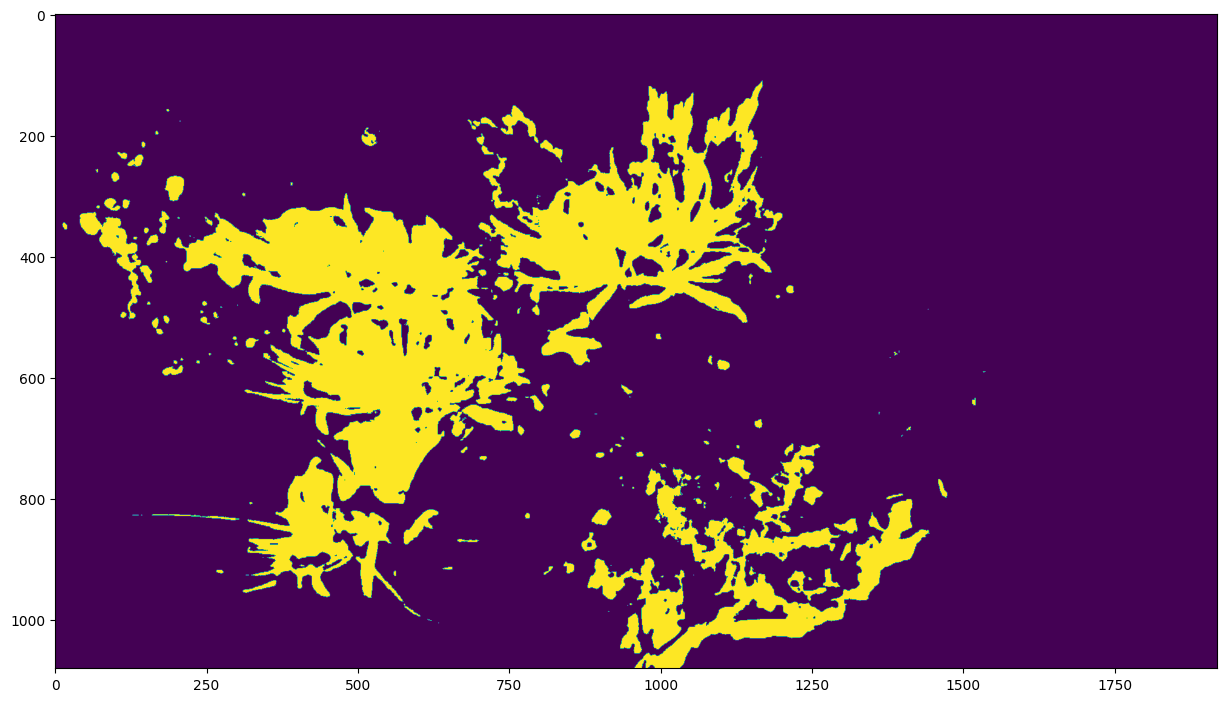

In [ ]:
plt.figure(figsize=(15.,10.))
plt.imshow(Image.fromarray(our_array, mode="L"))